<h2>Justin Sherwood</h2>
<h3>May 6, 2024 </h3>
Final Project dataset using Python to perform an analysis of patient heart disease data</h3>
The goal of this notebook is to read in multiple files supporting patient data results. The benefit of this dataset is it already came in a cleansed state which will allow the analysis to start.  There will be further analysis performed and as I begin to answer the questions.  There may be a potential for further cleaning beyond the intial cleaning performed by the author. Additionally, this will provide the basic command to explore the data set.</h4><br>

The potential client for this analysis could be a healthcare provider, such as a hospital, clinic, or health insurance company, looking to better understand and address heart disease risk factors among their patient population.<br><br>
>By examining the correlation between various factors and heart disease, the client can identify demographic groups or individuals with a higher risk of developing heart disease. This information can help target preventive interventions more effectively.<br><br> 
>Understanding how lifestyle factors such as smoking, alcohol consumption, and demographics influence heart disease risk allows the client to develop targeted intervention strategies.<br><br> 
>Hospitals can use the findings as a basis for further investigation into the mechanisms underlying heart disease development and potential avenues for treatment or prevention. </ul>ion.

Dataset used - https://www.kaggle.com/datasets/kamilpytlak/personal-key-indicators-of-heart-disease
downloaded the cleaned dataset - Indicators of Heart Disease.

Analysis goal, to answer the following questions: 

>What is the correlation between BMI and the likelihood of having heart disease?<br><br>
>How does smoking impact the prevalence of heart disease among different age groups?<br><br>
>Is there a significant difference in the occurrence of heart disease between males and females?<br><br>
>What is the association between alcohol consumption and the incidence of heart disease?<br><br>
>Are there any notable disparities in heart disease rates among different racial groups?<br><br>

In [2]:
#Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
import scipy.stats as stats

In [3]:
# Importing the external data set into a Pandas dataframe.
df = pd.read_csv('heart_2020_cleaned.csv')

Converting the Yes/No into numerical values to be used in the analysis

In [4]:
# Convert categorical values in columns to numerical format
df['HeartDisease'] = df['HeartDisease'].map({'Yes': 1, 'No': 0})
df['Smoking'] = df['Smoking'].map({'Yes': 1, 'No': 0})
df['AlcoholDrinking'] = df['AlcoholDrinking'].map({'Yes': 1, 'No': 0})

In [29]:
#Show inital dataframe
df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,0,0,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,1,0,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,0,0,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,0,0,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,1,0,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,0,0,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,0,0,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


Begin the data analysis process of the initial dataframe.  Perform basic exploratory functions to get a better understanding of the dataset.

In [30]:
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,3.37171,3.898366,7.097075
std,0.279766,6.356100,0.492281,0.251912,7.95085,7.955235,1.436007
min,0.000000,12.020000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,0.000000,24.030000,0.000000,0.000000,0.00000,0.000000,6.000000
50%,0.000000,27.340000,0.000000,0.000000,0.00000,0.000000,7.000000
75%,0.000000,31.420000,1.000000,0.000000,2.00000,3.000000,8.000000
max,1.000000,94.850000,1.000000,1.000000,30.00000,30.000000,24.000000


In [31]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [32]:
df.shape

(319795, 18)

In [33]:
df.dtypes

HeartDisease          int64
BMI                 float64
Smoking               int64
AlcoholDrinking       int64
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [34]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,0,20.34,0,0,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,0,26.58,1,0,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,0,24.21,0,0,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,0,23.71,0,0,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [35]:
df.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
319790,1,27.41,1,0,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,0,29.84,1,0,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,0,24.24,0,0,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,0,32.81,0,0,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No
319794,0,46.56,0,0,No,0.0,0.0,No,Female,80 or older,Hispanic,No,Yes,Good,8.0,No,No,No


In [36]:
df.sample()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
187744,0,29.29,1,0,No,30.0,4.0,Yes,Female,65-69,White,No,No,Very good,9.0,Yes,No,No


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

Question 1 - What is the correlation between BMI and the likelihood of having heart disease?

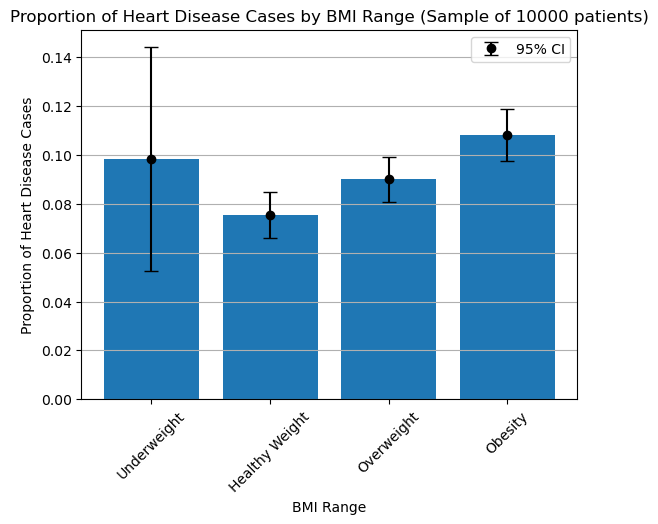

Proportion of Heart Disease Cases by BMI Range:
BMI Range
Underweight       0.098160
Healthy Weight    0.075269
Overweight        0.089875
Obesity           0.108108
Name: HeartDisease, dtype: float64

95% Confidence Intervals:
BMI Range
Underweight       (0.05248379539454832, 0.14383522301035967)
Healthy Weight     (0.0657901576566165, 0.08474747675198566)
Overweight        (0.08053906664396501, 0.09921128009667299)
Obesity           (0.09744236462519895, 0.11877385159101728)
Name: HeartDisease, dtype: object


In [38]:
# Sample 10000 patients randomly
sample_df = df.sample(n=10000, random_state=42)  

# Define BMI ranges
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']

#BMI values into ranges
sample_df['BMI Range'] = pd.cut(sample_df['BMI'], bins=bins, labels=labels)

# Calculate proportion of patients with HeartDisease in each BMI range
heart_disease_proportion = sample_df.groupby('BMI Range', observed=True)['HeartDisease'].mean()

# Calculate 95% confidence intervals for the proportion of Heart Disease cases
def calculate_ci(data):
    p = data.mean()
    n = len(data)
    se = np.sqrt((p * (1 - p)) / n)
    z = stats.norm.ppf(0.975)  # 95% confidence interval
    lower_ci = p - z * se
    upper_ci = p + z * se
    return lower_ci, upper_ci

ci_intervals = sample_df.groupby('BMI Range', observed=True)['HeartDisease'].apply(calculate_ci)

# Plot bar chart with confidence intervals
plt.bar(heart_disease_proportion.index, heart_disease_proportion)
plt.errorbar(heart_disease_proportion.index, heart_disease_proportion, 
             yerr=[heart_disease_proportion - ci_intervals.apply(lambda x: x[0]), 
                   ci_intervals.apply(lambda x: x[1]) - heart_disease_proportion], 
             fmt='o', color='black', capsize=5, label='95% CI')
plt.title('Proportion of Heart Disease Cases by BMI Range (Sample of 10000 patients)')
plt.xlabel('BMI Range')
plt.ylabel('Proportion of Heart Disease Cases')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.legend()
plt.show()

print("Proportion of Heart Disease Cases by BMI Range:")
print(heart_disease_proportion)
print("\n95% Confidence Intervals:")
print(ci_intervals)

Analysis of question 1:

Class analysis 
Underweight - The proportion of Heart Disease cases among underweight individuals is approximately 9.8%, with a wide confidence interval indicating some uncertainty due to the smaller sample size.

Healthy Weight - Individuals with a normal BMI, the proportion of Heart Disease cases is approximately 7.5%, with a relatively narrow confidence interval suggesting higher confidence in this estimate

Overweight - The proportion of Heart Disease cases among overweight individuals is around 9.0%, with a moderate confidence interval suggesting some variability in the estimate.

Obesity - In the obesity category, the proportion of Heart Disease cases is approximately 10.8%, with a confidence interval indicating moderate precision in the estimate.

the analysis reflects a trend of increasing proportions of Heart Disease cases from healthy weight to overweight and obesity categories, with the most significant proportion observed in the obesity category. Confidence intervals provide insights into the precision of these estimates, with narrower intervals indicating higher confidence in the proportions Further studies would be needed to establish any relationships between BMI and Heart Disease.

Question 2 - How does smoking impact the prevalence of heart disease among different age groups?

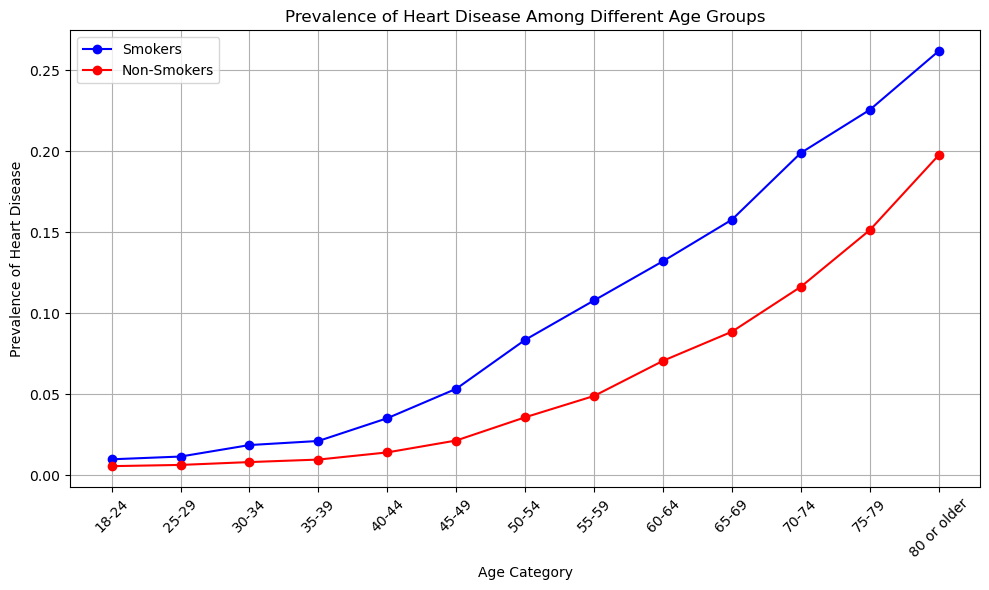

,AgeCategory,T-Statistic,P-Value,Significance
0,18-24,2.845706,4.435589e-03,Yes
1,25-29,3.515660,4.398069e-04,Yes
2,30-34,6.419349,1.401397e-10,Yes
3,35-39,6.829545,8.756386e-12,Yes
4,40-44,10.112839,5.499397e-24,Yes
5,45-49,12.769450,3.302239e-37,Yes
6,50-54,16.484288,9.849830e-61,Yes
7,55-59,19.345713,7.161063e-83,Yes
8,60-64,18.956154,1.022780e-79,Yes
9,65-69,19.701931,6.237725e-86,Yes


In [43]:
# Group data by age category and smoking status, and calculate prevalence of heart disease
age_smoking_grouped = df.groupby(['AgeCategory', 'Smoking'])['HeartDisease'].mean().reset_index()

# Create an empty list to store DataFrames
dfs_to_concat = []

# Plotting
plt.figure(figsize=(10, 6))

# Plot prevalence of heart disease among smokers
plt.plot(smokers['AgeCategory'], smokers['HeartDisease'], marker='o', label='Smokers', color='blue')

# Plot prevalence of heart disease among non-smokers
plt.plot(non_smokers['AgeCategory'], non_smokers['HeartDisease'], marker='o', label='Non-Smokers', color='red')

plt.title('Prevalence of Heart Disease Among Different Age Groups')
plt.xlabel('Age Category')
plt.ylabel('Prevalence of Heart Disease')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# interate through the age categories and peform statistical analysis
for age_category in df['AgeCategory'].unique():
    smokers_age = df[(df['AgeCategory'] == age_category) & (df['Smoking'] == 1)]['HeartDisease']
    non_smokers_age = df[(df['AgeCategory'] == age_category) & (df['Smoking'] == 0)]['HeartDisease']
    
    # Perform t-test
    t_stat, p_value = stats.ttest_ind(smokers_age, non_smokers_age)
    
    # Determine significance
    if p_value < 0.05:
        significance = "Yes"
    else:
        significance = "No"
    
    # Append results to list
    dfs_to_concat.append(pd.DataFrame({'AgeCategory': [age_category],
                                       'T-Statistic': [t_stat],
                                       'P-Value': [p_value],
                                       'Significance': [significance]}))

# Concatenate DataFrames from the list and Order DataFrame by age category
t_test_results = pd.concat(dfs_to_concat, ignore_index=True)
t_test_results = t_test_results.sort_values(by='AgeCategory').reset_index(drop=True)

# Display ordered DataFrame
display(t_test_results)

Analysis of question 2:

There is a statistically significant difference in heart disease between smokers and non-smokers across all age categories. This finding is significant given the low p-values (< 0.05) for each age group, suggesting strong evidence against the null hypothesis.  

The T-Statistic values increase as the age categories progress, indicating that the differences between adjacent age groups become more pronounced as people get older.

The P-Values are extremely small across all age categories, indicating strong evidence against the null hypothesis of no difference between age groups

The analysis suggests that there are significant differences between age categories being measured, and these differences tend to increase as individuals move into older age groups.  The findings reinforce the well-established link between smoking and cardiovascular disease.


Question 3 - Is there a significant difference in the occurrence of heart disease between males and females?


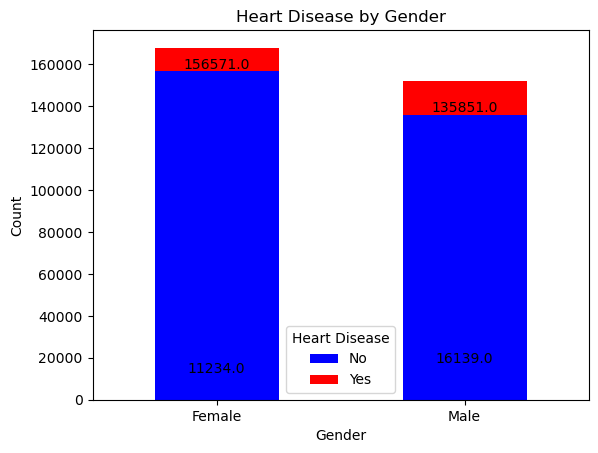

Chi-squared test statistic: 1568.3069168517372
P-value: 0.0
There is a significant difference in the occurrence of heart disease between males and females.


In [40]:
# Create a contingency table of 'Sex' and 'HeartDisease'
contingency_table = pd.crosstab(df['Sex'], df['HeartDisease'])

# Plotting the contingency table as a bar plot
ax = contingency_table.plot(kind='bar', stacked=True, color=['blue', 'red'])

# Add counts within the bars
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                xytext=(0, 5), textcoords='offset points')

plt.title('Heart Disease by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the test statistic and p-value
print("Chi-squared test statistic:", chi2)
print("P-value:", p)

# Check significance level
alpha = 0.05
if p < alpha:
    print("There is a significant difference in the occurrence of heart disease between males and females.")
else:
    print("There is no significant difference in the occurrence of heart disease between males and females.")

Analysis of question 3:

In this case, the chi-squared test statistic is 1568.31, which is quite large. This suggests a substantial difference between the observed counts and what would be expected if there were no relationship between gender and heart disease.

The p-value associated with the chi-squared test is 0.0, indicating that the probability of observing results under the assumption of no association between gender and heart disease is essentially zero. In other words, it's highly unlikely that the observed relationship between gender and heart disease occurred by chance.

Therefore, with such a low p-value, we reject the null hypothesis (the hypothesis that there is no association between gender and heart disease). Consequently, we conclude that there is a significant difference in the occurrence of heart disease between males and females.

Question 4 - What is the association between alcohol consumption and the incidence of heart disease?

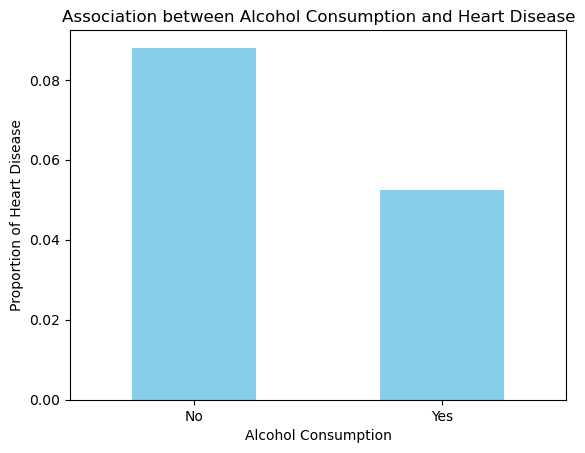

Chi-squared test statistic: 328.64916890132054
P-value: 1.892352227090306e-73
There is a significant association between alcohol consumption and the incidence of heart disease.


In [41]:
# Group data by 'AlcoholDrinking' and calculate the proportion of heart disease
alcohol_heart_disease = df.groupby('AlcoholDrinking')['HeartDisease'].mean()

# Plotting the association between alcohol consumption and heart disease
alcohol_heart_disease.plot(kind='bar', color='skyblue')
plt.title('Association between Alcohol Consumption and Heart Disease')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Proportion of Heart Disease')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)  # Changing labels to 'No' and 'Yes'
plt.show()

# Create a contingency table of 'AlcoholDrinking' and 'HeartDisease'
contingency_table = pd.crosstab(df['AlcoholDrinking'], df['HeartDisease'])

# Perform chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Print the test statistic and p-value
print("Chi-squared test statistic:", chi2)
print("P-value:", p)

# Check significance level
alpha = 0.05
if p < alpha:
    print("There is a significant association between alcohol consumption and the incidence of heart disease.")
else:
    print("There is no significant association between alcohol consumption and the incidence of heart disease.")

Analysis of question 4:

The chi-squared test statistic is 328.649. This value indicates the magnitude of difference between the observed frequency distribution of heart disease among different alcohol consumption groups and the expected distribution if there were no association between alcohol consumption and heart disease. A higher chi-squared test statistic suggests a stronger association.

The p-value associated with the chi-squared test is approximately 1.89e-73, which is extremely small. This indicates strong evidence against the null hypothesis, which assumes no association between alcohol consumption and heart disease.  With p-value below the significance level of 0.05, we can reject the null hypothesis. Therefore, we conclude that there is a significant association between alcohol consumption and the incidence of heart disease.

Health professionals may consider these results when making recommendations regarding alcohol consumption and its potential impact on heart health.

Question 5 - Are there any notable disparities in heart disease rates among different racial groups?

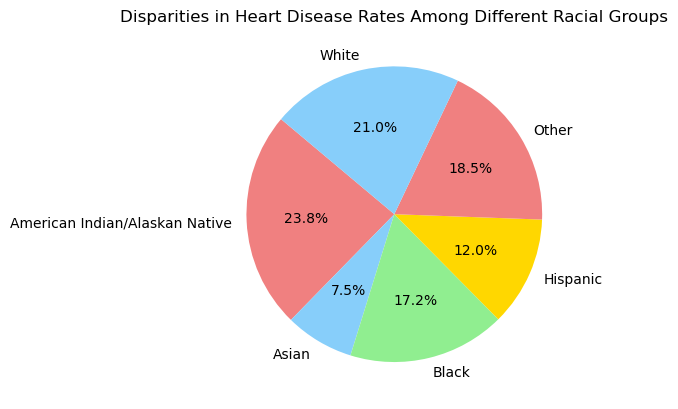

F-statistic: 169.30680865022566
P-value: 1.7236549956887934e-180
There are notable disparities in heart disease rates among different racial groups (reject null hypothesis).


In [5]:
# Group data by 'Race' and calculate the proportion of heart disease
racial_heart_disease = df.groupby('Race')['HeartDisease'].mean()

# Plotting the disparities in heart disease rates among different racial groups as a pie chart
racial_heart_disease.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue', 'lightgreen', 'gold'])
plt.title('Disparities in Heart Disease Rates Among Different Racial Groups')
plt.ylabel('') # Remove the default label on y-axis
plt.show()

# Group data by 'Race' and collect heart disease rates for each group
racial_groups = []
for group_name, group_data in df.groupby('Race')['HeartDisease']:
    racial_groups.append(group_data)

# Perform one-way ANOVA test
f_statistic, p_value = f_oneway(*racial_groups)

# Print the test statistic and p-value
print("F-statistic:", f_statistic)
print("P-value:", p_value)

# Check significance level
alpha = 0.05
if p_value < alpha:
    print("There are notable disparities in heart disease rates among different racial groups (reject null hypothesis).")
else:
    print("There are no notable disparities in heart disease rates among different racial groups (fail to reject null hypothesis).")

Analysis of question 5:

With an F-statistic of approximately 169.31 and an extremely small p-value
−180
 ), we have strong evidence to reject the null hypothesis. This indicates that there are notable disparities in heart disease rates among different racia

Therefore, based on both the visual representation and the statistical test results, we can confidently conclude that there are significant disparities in heart disease rates across the racial groups included in the analysis. l groups.